In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle 

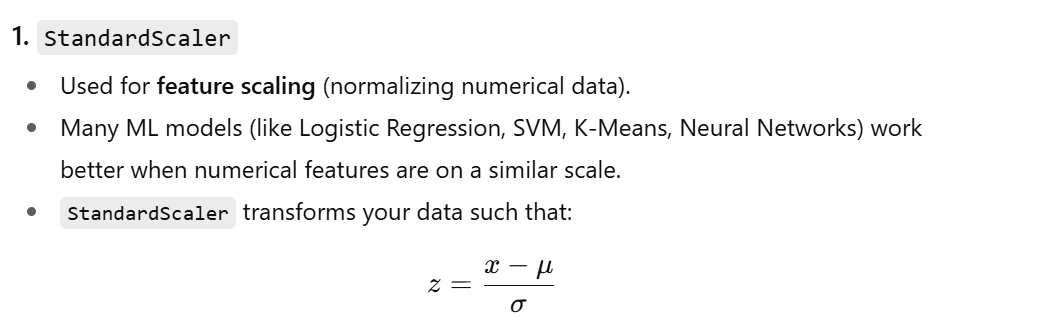


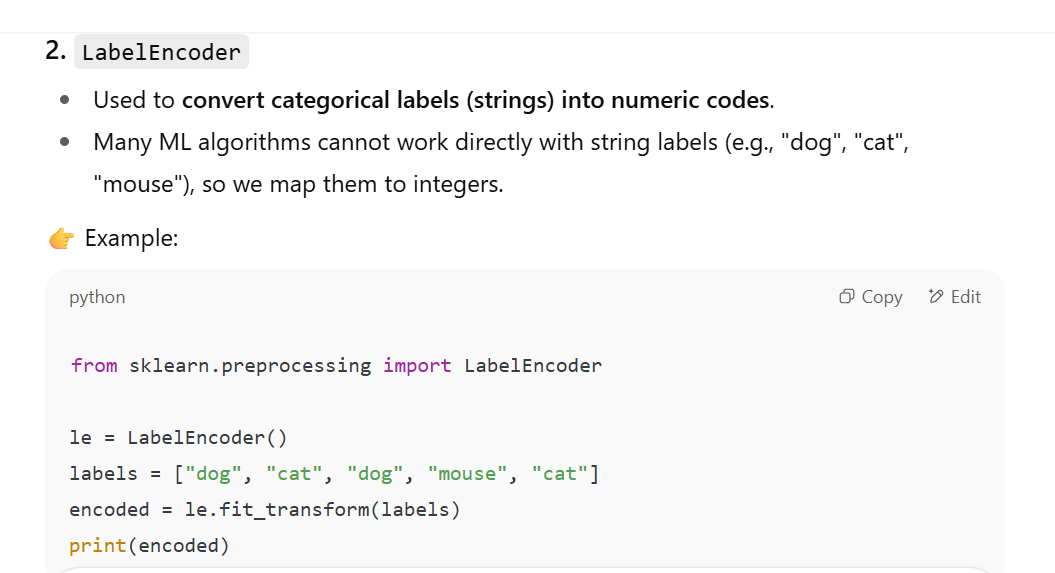

In [2]:
#load the dataset
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
##we will predict if the person is exited or not
#preprocess the data
#drop the irrelevant column
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Encode categorical variable
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#we wont directly apply label encoder to the geography, instead we will do one hot encoding as it will give france =0, spain=1 and germany as 2, in result it will think germany is greater than spain
#onehot endode geography column
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

<10000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [6]:
onehot_encoder_geo.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [7]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
geo_encoded_df=pd.DataFrame(geo_encoder.toarray(), columns=onehot_encoder_geo.get_feature_names_out())
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [9]:
#combine one hot encoder columns with original data
data=pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [10]:
#save the encoder and scaler
#pickle: A pickle file in Python is a file that stores Python objects in a serialized (byte stream) format so that they can be saved to disk and later reloaded into a Python program. 
#The process is called pickling (serialization) and the reverse is called unpickling (deserialization).
with open('label_encoder_gender.pkl','wb') as file: #write byte mode
    pickle.dump(label_encoder_gender, file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo, file)

In [14]:
#example for pickle file
import pickle

# Example object (dictionary)
data1 = {"name": "Harshita", "age": 25, "skills": ["Python", "ML", "AI"]}

# Save to pickle file
with open("data1.pkl", "wb") as file:
    pickle.dump(data1, file)

# Load from pickle file
with open("data1.pkl", "rb") as file:
    loaded_data = pickle.load(file)

print(loaded_data)


{'name': 'Harshita', 'age': 25, 'skills': ['Python', 'ML', 'AI']}


In [11]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [12]:
#divide the dataset into independent and dependent features
X=data.drop('Exited',axis=1) # Independent features
y=data['Exited'] # Dependent feature (Target variable)

#split the data in training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [73]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

1. Sequential nn
2. Dense=64 (hidden layer have 64 hidden neurons)
3. Activation function= sigmoid, tanh, relu, leaky relu
4. optimizer= back propogation for updating weights
5. Loss function decrease
6. Metrics: accuracy, mean squared error, mean absolute error
7. Training; logs: folder: tensorboard

**ANN IMPLEMENTATION**

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

d:\Udemy_dup\GenAI\finenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\Udemy_dup\GenAI\finenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\Udemy_dup\GenAI\finenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations i

In [15]:
#build our ann  model
model= Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), #HL1 connected with input layer
    Dense(32,activation='relu'),#HL2
    Dense(1,activation='sigmoid')#output layer
])

d:\Udemy_dup\GenAI\finenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
X_train.shape[1]

12

In [17]:
(X_train.shape[1],)

(12,)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#import tensorflow
opt=tf.keras.optimizers.Adam(learning_rate=0.01)#in this case we can provide changable learning rates
#loss=tf.keras.losses.BinaryCrossentropy() you can use in this way also

In [20]:
##Compile the model
model.compile(optimizer=opt, loss="binary_crossentropy",metrics=['accuracy'])

In [21]:
##Set up the tensorboard
log_dir="logs/fit/"
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [22]:
#set uup early stopping (if after some epochs loss function is not decreasing, we can stop training)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

In [23]:
#Training the model
history=model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8328 - loss: 0.3958 - val_accuracy: 0.8495 - val_loss: 0.3558
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8544 - loss: 0.3590 - val_accuracy: 0.8605 - val_loss: 0.3417
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8560 - loss: 0.3510 - val_accuracy: 0.8585 - val_loss: 0.3508
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8590 - loss: 0.3480 - val_accuracy: 0.8620 - val_loss: 0.3488
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8609 - loss: 0.3422 - val_accuracy: 0.8475 - val_loss: 0.3530
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8609 - loss: 0.3416 - val_accuracy: 0.8505 - val_loss: 0.3693
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8610 - loss: 0.3407 - val_accuracy: 0.8550 - val_loss: 0.3423


In [24]:
model.save('model.h5')

In [25]:
#load tensorboard extension
%load_ext tensorboard
#%reload_ext tensorboard

In [28]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 2308), started 5 days, 0:52:59 ago. (Use '!kill 2308' to kill it.)

In [29]:
!taskkill /PID 2308 /F


ERROR: The process "2308" not found.


In [ ]:
%tensorboard --logdir logs/fit --port 6006 #I used port 6006 because that’s the default port TensorBoard always tries to run on.

Reusing TensorBoard on port 6006 (pid 14312), started 0:00:16 ago. (Use '!kill 14312' to kill it.)